In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0



step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.shape

(6362620, 11)

In [7]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


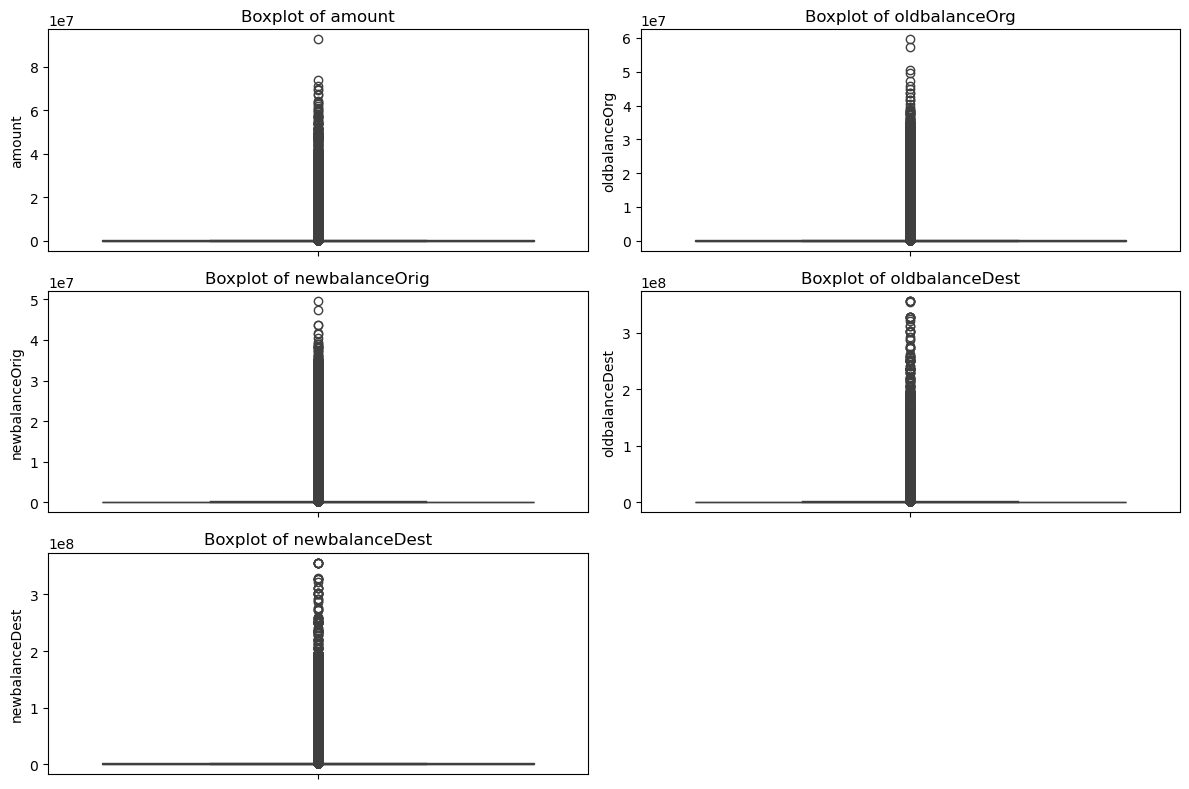

In [11]:


# List of numerical columns
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Plot boxplots to check for outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()


As we can see, the difference between the outliers and the remaining datapoints is not huge except for the amount column.

Factually by looking at the data, we could say that transactions of more than 200000 are mostyl deemed fraud, and transactions with either newbalanceDest or oldbalanceDest as 0 deemed as fraud,with special privelege given to Merchants.

Lets create two datasets, one for transactions involving normal customers and other for merchants

In [15]:
dfM = df[df['nameDest'].str.startswith('M')]
dfM

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [16]:
dfM['isFraud'].values.max()

0

In [17]:
dfM['isFlaggedFraud'].values.max()

0

From the following we could conclude that there is no need of creating an extra dataset .Hence we will be working on the original dataset.

From the input given by the data dictionary, an illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.
Lets transform values in the dataset such that transactions exceeding 200000 are flagged as a illegal attempt

In [20]:
df['isFlaggedFraud'] = (df['amount'] > 200000).astype(int)

In [21]:
df.tail(32)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362588,741,TRANSFER,114149.44,C1157446475,114149.44,0.0,C1367473638,0.00,0.00,1,0
6362589,741,CASH_OUT,114149.44,C1235786818,114149.44,0.0,C1738374799,0.00,114149.44,1,0
6362590,741,TRANSFER,323726.61,C509686434,323726.61,0.0,C1310143791,0.00,0.00,1,1
6362591,741,CASH_OUT,323726.61,C919525792,323726.61,0.0,C993635374,561753.58,885480.19,1,1
6362592,741,TRANSFER,383661.10,C457476945,383661.10,0.0,C1688658215,0.00,0.00,1,1
6362593,741,CASH_OUT,383661.10,C369315575,383661.10,0.0,C2069429837,1788112.70,2171773.80,1,1
6362594,741,TRANSFER,144945.34,C31496887,144945.34,0.0,C1251365829,0.00,0.00,1,0
6362595,741,CASH_OUT,144945.34,C1092829426,144945.34,0.0,C716019997,0.00,144945.34,1,0
6362596,741,TRANSFER,48442.88,C1112979339,48442.88,0.0,C2114078084,0.00,0.00,1,0
6362597,741,CASH_OUT,48442.88,C1706094385,48442.88,0.0,C2109905271,513746.19,562189.07,1,0


Let us name the col 'isFlaggedFraud' as 'isOverLimit' as there are transactions that have exceeded the limit of 200000 but are not detected as fraud

In [23]:
df.rename(columns={'isFlaggedFraud': 'isOverLimit'}, inplace=True)
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isOverLimit
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,1


Now lets start with building the model

We will be employing the random forest algorithm. It
Handles large datasets efficiently.,
Robust to outliers and noise and 
Provides feature importance to explain results.


In [26]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [27]:
correlation_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isOverLimit']].corrwith(df['isFraud'])
print(correlation_matrix)


amount            0.076688
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isOverLimit       0.032916
dtype: float64


The factors we are choosing are 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isOverLimit'.
The target column is 'isFraud'.The reason for the factors are obvious. Amount of transaction is important in detecting fraud. Any high or low amount of
money transacted can generate suspicion. 'newBalanceDest' should be equal to the difference of amount and 'oldBalancedDest'.Any inequalities in its 
value can be sign of fraudulent activity. As for 'oldbalanceDest'and  'newbalanceDest' , we have already discussed the possibility of a fraud if either of them are zero in case of non merchant transactions.
IsOverLimit is the first parameter that ticks the partial possibility of a fraud transaction. 

In [29]:
X = df[[ 'amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest','isOverLimit']]  
y = df['isFraud'] 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [56]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [58]:
y_pred = rf_model.predict(X_test)

In [60]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9995811473889687

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.73      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [62]:
from sklearn.metrics import  mean_squared_error

In [64]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.0004


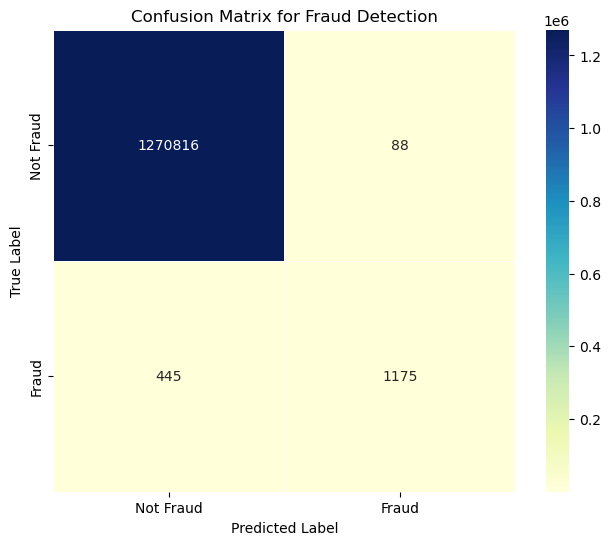

In [66]:


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, square=True,
            xticklabels=['Not Fraud', 'Fraud'],   # Class labels for X-axis
            yticklabels=['Not Fraud', 'Fraud'])   # Class labels for Y-axis

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Fraud Detection')
plt.show()

In my opinion, as a preventive measure ,the company should set a limit such that that the sum of all transactions in a day shouldn't exceed.It should be the first line of defence against malicious financial activities. 

In [71]:
from joblib import dump
dump(rf_model, 'fraud_detection_model.pkl')
print("Model saved successfully with joblib!")



Model saved successfully with joblib!
